In [2366]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import norm, stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

#import plotty
import warnings
warnings.filterwarnings('ignore')

In [2367]:
#Read Csv file
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [2368]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [2369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [2370]:
#shape of the dataset
df.shape

(1599, 12)

In [2371]:
#check the duplicate values
df.duplicated().sum()

240

In [2372]:
#removing duplicates value
df=df.drop_duplicates()

In [2373]:
#Actual dataset after removing
df.shape

(1359, 12)

In [2374]:
#check the null values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [2375]:
# analyize the correlation
corr = df.corr()
corr.shape

(12, 12)

<function matplotlib.pyplot.show(close=None, block=None)>

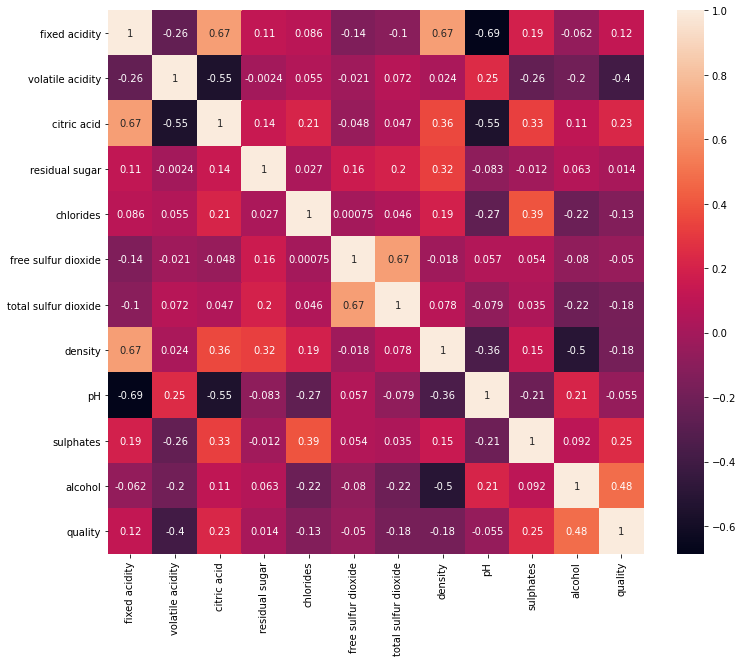

In [2376]:
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True)
plt.show

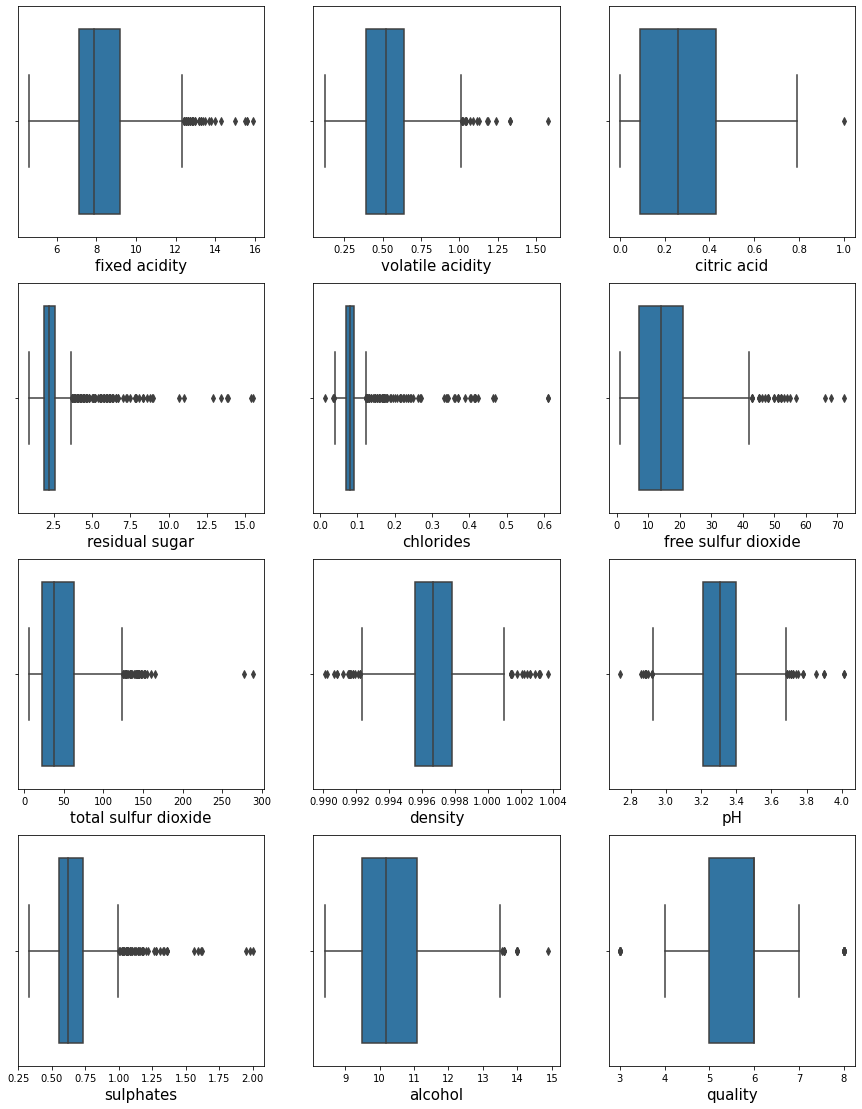

In [2377]:
#visaulize the columns by using boxplot
plt.figure(figsize =(15,50))
graph=1
for column in df:
    if graph<30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show()  

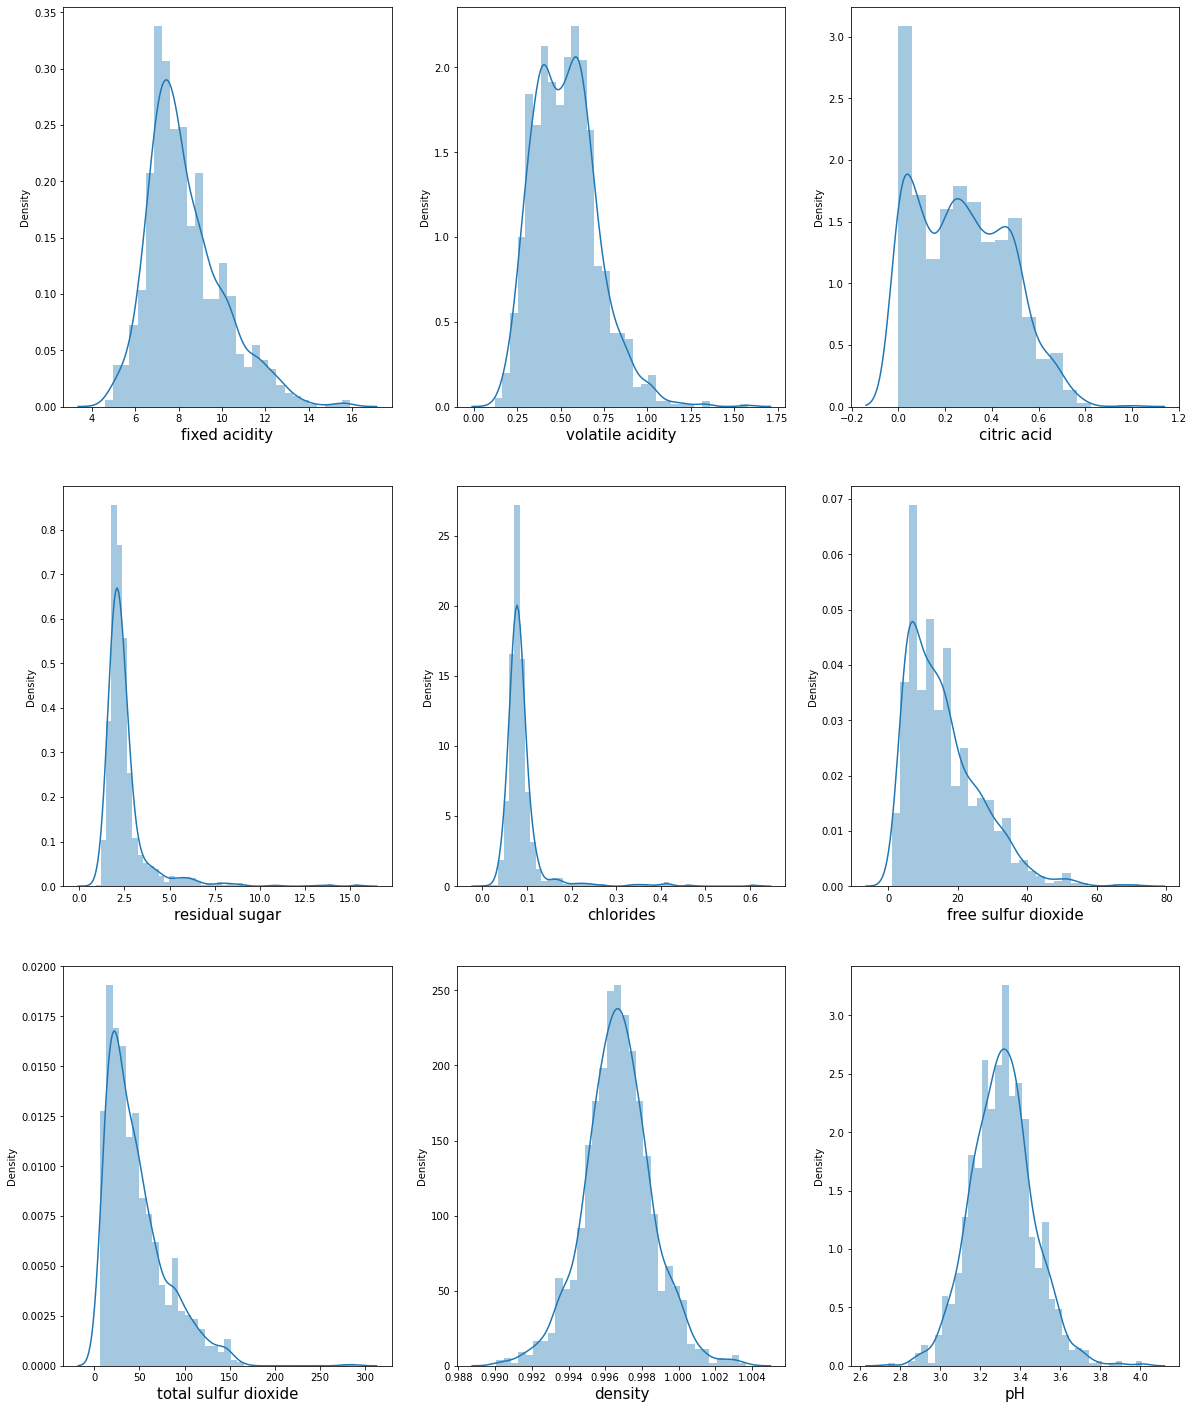

In [2378]:
#visaulize the columns by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show()    

# Column1: 'Fixed acidity'

In [2379]:
#check the coloumn comntains any zero value or not
df['fixed acidity'].unique()

array([ 7.4,  7.8, 11.2,  7.9,  7.3,  7.5,  6.7,  5.6,  8.9,  8.5,  8.1,
        7.6,  6.9,  6.3,  7.1,  8.3,  5.2,  5.7,  8.8,  6.8,  4.6,  7.7,
        8.7,  6.4,  6.6,  8.6, 10.2,  7. ,  7.2,  9.3,  8. ,  9.7,  6.2,
        5. ,  4.7,  8.4, 10.1,  9.4,  9. ,  8.2,  6.1,  5.8,  9.2, 11.5,
        5.4,  9.6, 12.8, 11. , 11.6, 12. , 15. , 10.8, 11.1, 10. , 12.5,
       11.8, 10.9, 10.3, 11.4,  9.9, 10.4, 13.3, 10.6,  9.8, 13.4, 10.7,
       11.9, 12.4, 12.2, 13.8,  9.1, 13.5, 10.5, 12.6, 14. , 13.7,  9.5,
       12.7, 12.3, 15.6,  5.3, 11.3, 13. ,  6.5, 12.9, 14.3, 15.5, 11.7,
       13.2, 15.9, 12.1,  5.1,  4.9,  5.9,  6. ,  5.5])

In [2380]:
#check the zero value
df['fixed acidity'].all()

True

In [2381]:
#count the value of each datapoint
df['fixed acidity'].value_counts()

7.2     49
7.8     48
7.1     46
7.0     44
7.5     42
        ..
4.6      1
13.5     1
4.9      1
15.9     1
15.0     1
Name: fixed acidity, Length: 96, dtype: int64

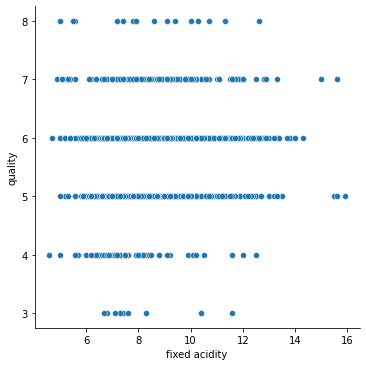

In [2382]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'fixed acidity', y='quality')

In [2383]:
# Calculate mean and std 
mu= df['fixed acidity'].mean()
print(mu)
b= df['fixed acidity'].std()
print(b)

8.310596026490087
1.736989807532466


Text(8, 110, '$\\mu=8.310596026490087, b=1.736989807532466$')

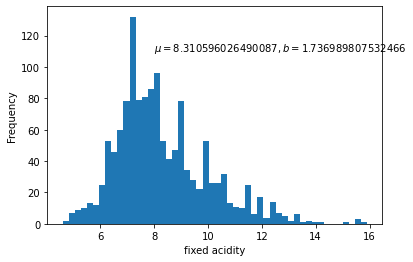

In [2384]:
# visualize by histogram
df['fixed acidity'].plot(kind ='hist', bins=50)
plt.xlabel('fixed acidity')
plt.text(8, 110, r'$\mu=8.310596026490087, b=1.736989807532466$')

In [2385]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['fixed acidity'], 30,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['fixed acidity'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1


In [2386]:
# higher side 
higher_side = df['fixed acidity'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['fixed acidity'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Name: fixed acidity, Length: 1359, dtype: bool
(array([ 174,  182,  188,  212,  214,  232,  233,  237,  248,  251,  255,
        283,  285,  291,  294,  295,  296,  299,  302,  308,  311,  313,
        314,  317,  318,  319,  328,  329,  330,  334,  344,  345,  347,
        350,  355,  357,  366,  375,  377,  378,  383,  384,  385,  389,
        392,  400,  405,  411,  413,  427,  444,  445,  449,  463,  467,
        473,  477,  483,  485,  486,  487,  494,  498,  503,  504,  505,
        506,  517,  518,  520,  522,  531,  536,  565,  569,  575,  588,
        605,  644,  701,  704,  719,  738,  799,  835,  902,  926, 1042,
       1139, 1152, 1233], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Name

In [2387]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (1267, 12)


Text(0.5, 0, 'fixed acidity')

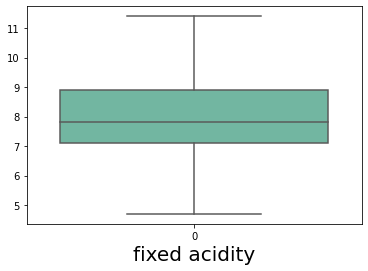

In [2388]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["fixed acidity"], palette="Set2", dodge=False)

plt.xlabel('fixed acidity', fontsize=20)

Text(0, 0.5, 'Density')

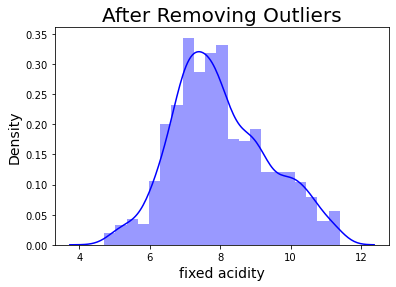

In [2389]:
# Visualize the boxplot after removing outliers
sns.distplot(df['fixed acidity'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('fixed acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Column2: Volatile acidity

In [2390]:
#check the null values, zero values in this column
df['volatile acidity'].unique()

array([0.7  , 0.88 , 0.76 , 0.28 , 0.66 , 0.6  , 0.65 , 0.58 , 0.5  ,
       0.615, 0.61 , 0.62 , 0.56 , 0.59 , 0.32 , 0.22 , 0.39 , 0.43 ,
       0.49 , 0.4  , 0.41 , 0.71 , 0.645, 0.675, 0.685, 0.655, 0.605,
       0.38 , 1.13 , 0.45 , 0.67 , 0.935, 0.29 , 0.31 , 0.52 , 0.51 ,
       0.42 , 0.63 , 0.69 , 0.735, 0.725, 0.705, 0.785, 0.75 , 0.625,
       0.3  , 0.55 , 1.02 , 0.775, 0.9  , 0.545, 0.575, 0.33 , 0.54 ,
       1.07 , 0.695, 1.33 , 0.745, 1.04 , 0.715, 0.415, 0.34 , 0.68 ,
       0.95 , 0.53 , 0.64 , 0.885, 0.805, 0.73 , 0.37 , 0.835, 1.09 ,
       0.57 , 0.44 , 0.635, 0.82 , 0.48 , 1.   , 0.35 , 0.975, 0.87 ,
       0.26 , 0.27 , 0.2  , 0.36 , 0.83 , 0.18 , 0.46 , 0.47 , 0.77 ,
       0.815, 0.795, 0.665, 0.21 , 0.765, 0.24 , 0.85 , 0.84 , 0.96 ,
       0.78 , 0.23 , 0.365, 0.25 , 0.825, 0.72 , 0.595, 0.585, 0.915,
       0.755, 0.845, 1.24 , 0.8  , 0.98 , 1.185, 0.92 , 1.035, 1.025,
       0.565, 0.74 , 1.115, 0.865, 0.875, 0.965, 0.91 , 0.89 , 1.01 ,
       0.305, 0.395,

In [2391]:
#check the zero value
df['volatile acidity'].all()

True

In [2392]:
#count the value of each datapoint
df['volatile acidity'].value_counts()

0.500    34
0.580    33
0.400    32
0.600    31
0.430    31
         ..
0.865     1
1.090     1
0.565     1
0.975     1
1.180     1
Name: volatile acidity, Length: 142, dtype: int64

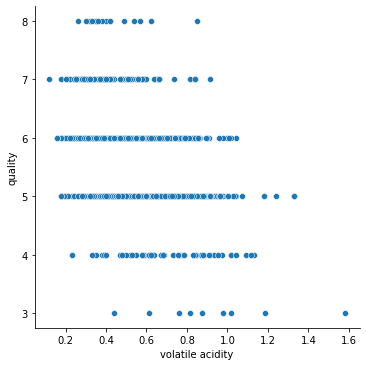

In [2393]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'volatile acidity', y='quality')

In [2394]:
# Calculate mean and std 
mu= df['volatile acidity'].mean()
print(mu)
b= df['volatile acidity'].std()
print(b)

0.5365272296764008
0.18483483898301442


Text(0.7, 80, '$\\mu=0.5365272296764008, b=0.18483483898301442$')

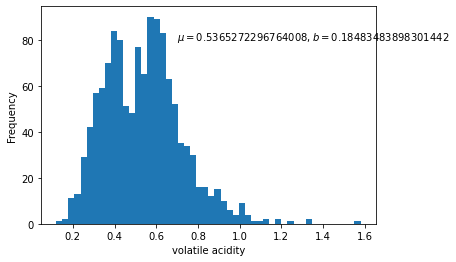

In [2395]:
# visualize by histogram
df['volatile acidity'].plot(kind ='hist', bins=50)
plt.xlabel('volatile acidity')
plt.text( 0.7,80,r'$\mu=0.5365272296764008, b=0.18483483898301442$')

In [2396]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['volatile acidity'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['volatile acidity'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [2397]:
# higher side 
higher_side = df['volatile acidity'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['volatile acidity'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Name: volatile acidity, Length: 1267, dtype: bool
(array([  35,   85,  108,  113,  114,  120,  140,  174,  204,  223,  332,
        424,  505,  514,  519,  527,  531,  536,  548,  558,  574,  590,
        657,  687,  775,  800,  926,  985, 1017, 1028, 1105, 1152, 1153],
      dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Name: volatile acidity, Length: 1267, dtype: bool
(array([], dtype=int64),)
old Shape:  (1267, 12)


In [2398]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (1234, 12)


Text(0.5, 0, 'volatile acidity')

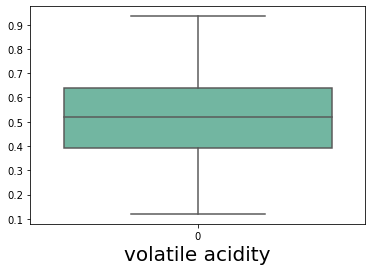

In [2399]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["volatile acidity"], palette="Set2", dodge=False)

plt.xlabel('volatile acidity', fontsize=20)

Text(0, 0.5, 'Density')

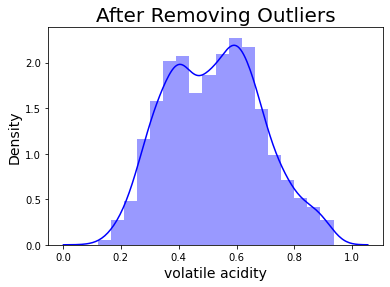

In [2400]:
# Visualize the boxplot after removing outliers
sns.distplot(df['volatile acidity'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('volatile acidity', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Column3: 'citric acid'

In [2401]:
#check the null values, zero values in this column
df['citric acid'].unique()

array([0.  , 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29, 0.18, 0.19, 0.28,
       0.51, 0.48, 0.31, 0.21, 0.11, 0.14, 0.16, 0.24, 0.07, 0.12, 0.25,
       0.3 , 0.2 , 0.22, 0.43, 0.52, 0.23, 0.37, 0.26, 0.15, 0.57, 0.4 ,
       0.49, 0.05, 0.54, 0.64, 0.7 , 0.47, 0.44, 0.17, 0.68, 0.53, 0.09,
       0.1 , 0.01, 0.55, 1.  , 0.03, 0.42, 0.33, 0.32, 0.35, 0.58, 0.6 ,
       0.5 , 0.76, 0.46, 0.45, 0.38, 0.39, 0.66, 0.61, 0.34, 0.73, 0.63,
       0.67, 0.69, 0.41, 0.59, 0.27, 0.74, 0.13, 0.65, 0.78])

In [2402]:
#check the zero value
df['citric acid'].all()

False

In [2403]:
#count the value of each datapoint
df['citric acid'].value_counts()

0.00    110
0.49     40
0.24     40
0.02     37
0.08     31
       ... 
1.00      1
0.74      1
0.76      1
0.67      1
0.69      1
Name: citric acid, Length: 75, dtype: int64

In [2404]:
#replace zero value by mean of the column
df['citric acid']= df['citric acid'].replace(0.00, df['citric acid'].mean())


In [2405]:
#check after replace
df['citric acid'].all()

True

In [2406]:
#check after replace
df['citric acid'].unique()

array([0.25451378, 0.04      , 0.56      , 0.06      , 0.02      ,
       0.36      , 0.08      , 0.29      , 0.18      , 0.19      ,
       0.28      , 0.51      , 0.48      , 0.31      , 0.21      ,
       0.11      , 0.14      , 0.16      , 0.24      , 0.07      ,
       0.12      , 0.25      , 0.3       , 0.2       , 0.22      ,
       0.43      , 0.52      , 0.23      , 0.37      , 0.26      ,
       0.15      , 0.57      , 0.4       , 0.49      , 0.05      ,
       0.54      , 0.64      , 0.7       , 0.47      , 0.44      ,
       0.17      , 0.68      , 0.53      , 0.09      , 0.1       ,
       0.01      , 0.55      , 1.        , 0.03      , 0.42      ,
       0.33      , 0.32      , 0.35      , 0.58      , 0.6       ,
       0.5       , 0.76      , 0.46      , 0.45      , 0.38      ,
       0.39      , 0.66      , 0.61      , 0.34      , 0.73      ,
       0.63      , 0.67      , 0.69      , 0.41      , 0.59      ,
       0.27      , 0.74      , 0.13      , 0.65      , 0.78   

In [2407]:
df.shape

(1234, 12)

Text(0.5, 0, 'citric acid')

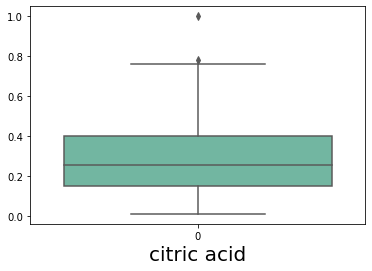

In [2408]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["citric acid"], palette="Set2", dodge=False)

plt.xlabel('citric acid', fontsize=20)

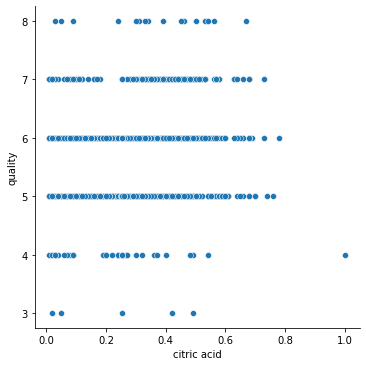

In [2409]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'citric acid', y='quality')

In [2410]:
# Calculate mean and std 
mu= df['volatile acidity'].mean()
print(mu)
b= df['volatile acidity'].std()
print(b)

0.5223541329011341
0.16393982498365312


Text(0.3, 100, '$\\mu=0.5223541329011341, b=0.16393982498365312$')

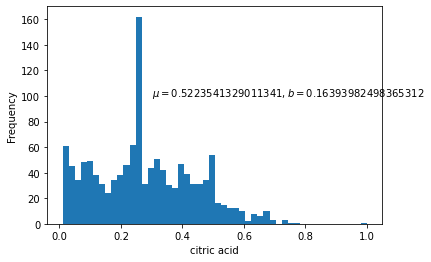

In [2411]:
# visualize by histogram
df['citric acid'].plot(kind ='hist', bins=50)
plt.xlabel('citric acid')
plt.text( 0.3,100,r'$\mu=0.5223541329011341, b=0.16393982498365312$')

In [2412]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['citric acid'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['citric acid'], 65,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [2413]:
# higher side 
higher_side = df['citric acid'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['citric acid'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Name: citric acid, Length: 1234, dtype: bool
(array([  68,   73,   93,  128,  211,  226,  263,  280,  284,  291,  302,
        317,  329,  338,  340,  345,  346,  350,  363,  375,  378,  383,
        401,  534,  552,  757,  792,  804,  805,  807,  957, 1004, 1204,
       1211, 1213], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
5       False
        ...  
1593    False
1594    False
1595    False
1597    False
1598    False
Name: citric acid, Length: 1234, dtype: bool
(array([], dtype=int64),)
old Shape:  (1234, 12)


In [2414]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (1199, 12)


Text(0.5, 0, 'citric acid')

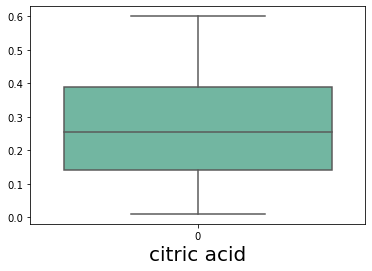

In [2415]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["citric acid"], palette="Set2", dodge=False)

plt.xlabel('citric acid', fontsize=20)

Text(0, 0.5, 'Density')

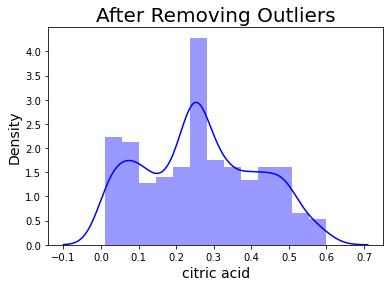

In [2416]:
# Visualize the boxplot after removing outliers
sns.distplot(df['citric acid'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('citric acid', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Column4: residual sugar

In [2417]:
#check the null values, zero values in this column
df['residual sugar'].unique()

array([ 1.9 ,  2.6 ,  2.3 ,  1.8 ,  1.6 ,  1.2 ,  2.  ,  6.1 ,  3.8 ,
        3.9 ,  1.7 ,  4.4 ,  2.4 ,  1.4 ,  2.5 , 10.7 ,  5.5 ,  2.1 ,
        5.9 ,  2.8 ,  2.2 ,  3.  ,  3.4 ,  5.1 ,  4.65,  1.5 ,  1.3 ,
        7.3 ,  7.2 ,  2.9 ,  2.7 ,  5.6 ,  3.1 ,  3.2 ,  3.3 ,  3.6 ,
        4.  ,  7.  ,  6.4 , 11.  ,  4.5 ,  7.9 ,  3.7 ,  6.7 ,  6.6 ,
       15.5 ,  8.3 ,  6.3 ,  4.6 ,  3.5 ,  6.  ,  8.6 ,  2.25,  2.85,
        3.45,  4.2 ,  2.35,  2.65,  9.  ,  8.8 ,  5.  ,  4.1 ,  1.65,
        2.05,  0.9 ,  6.2 ,  8.9 ,  8.1 ,  4.7 ,  4.3 ,  1.75,  7.8 ,
        5.8 , 12.9 , 13.4 ,  4.8 ,  2.15,  5.4 , 15.4 ,  5.2 ,  3.75,
       13.8 ,  5.7 ])

In [2418]:
#check the zero value
df['residual sugar'].all()

True

In [2419]:
#count the value of each datapoint
df['residual sugar'].value_counts()

2.00    119
1.80    100
2.20     97
1.90     92
2.10     92
       ... 
2.15      1
4.70      1
2.05      1
8.10      1
7.30      1
Name: residual sugar, Length: 83, dtype: int64

Text(0.5, 0, 'residual sugar')

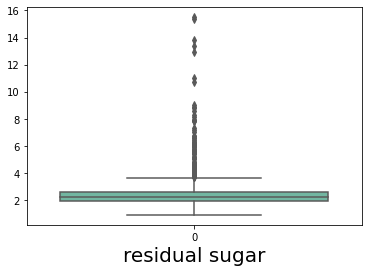

In [2420]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["residual sugar"], palette="Set2", dodge=False)

plt.xlabel('residual sugar', fontsize=20)

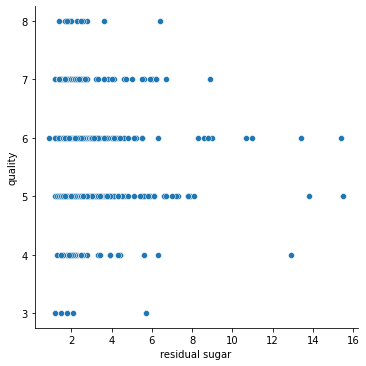

In [2421]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'residual sugar', y='quality')

In [2422]:
# Calculate mean and std 
mu= df['residual sugar'].mean()
print(mu)
b= df['residual sugar'].std()
print(b)

2.4786905754795665
1.3192007129462822


Text(3, 100, '$\\mu=2.479421626152557, b=1.3222373062586423$')

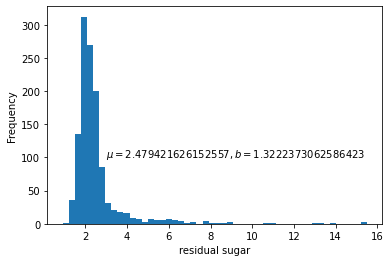

In [2423]:
# visualize by histogram
df['residual sugar'].plot(kind ='hist', bins=50)
plt.xlabel('residual sugar')
plt.text( 3,100,r'$\mu=2.479421626152557, b=1.3222373062586423$')

In [2424]:
#to many outliers, so, we drop this column
df.drop(columns=['residual sugar'], inplace=True)

In [2425]:
df.head()

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.254514,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.254514,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.254514,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [2426]:
df.shape

(1199, 11)

# Column5: chlorides

In [2427]:
#check the null values, zero values in this column
df['chlorides'].unique()

array([0.076, 0.098, 0.092, 0.075, 0.069, 0.065, 0.073, 0.071, 0.097,
       0.089, 0.114, 0.176, 0.17 , 0.368, 0.086, 0.341, 0.077, 0.082,
       0.106, 0.084, 0.085, 0.08 , 0.105, 0.083, 0.103, 0.066, 0.074,
       0.088, 0.332, 0.05 , 0.113, 0.068, 0.081, 0.11 , 0.07 , 0.111,
       0.079, 0.115, 0.094, 0.104, 0.401, 0.062, 0.107, 0.058, 0.102,
       0.091, 0.122, 0.09 , 0.119, 0.146, 0.072, 0.118, 0.049, 0.06 ,
       0.117, 0.087, 0.236, 0.095, 0.1  , 0.36 , 0.067, 0.27 , 0.099,
       0.046, 0.056, 0.054, 0.039, 0.101, 0.057, 0.337, 0.078, 0.263,
       0.063, 0.096, 0.343, 0.186, 0.112, 0.213, 0.214, 0.093, 0.061,
       0.052, 0.159, 0.045, 0.064, 0.059, 0.174, 0.127, 0.413, 0.152,
       0.053, 0.055, 0.051, 0.125, 0.2  , 0.171, 0.226, 0.25 , 0.108,
       0.148, 0.124, 0.143, 0.222, 0.157, 0.422, 0.034, 0.243, 0.241,
       0.19 , 0.132, 0.126, 0.038, 0.044, 0.041, 0.165, 0.048, 0.145,
       0.012, 0.109, 0.194, 0.161, 0.12 , 0.116, 0.414, 0.047, 0.216,
       0.043, 0.178,

In [2428]:
#check the zero value
df['chlorides'].all()

True

In [2429]:
#count the value of each datapoint
df['chlorides'].value_counts()

0.080    46
0.078    41
0.074    38
0.076    37
0.077    35
         ..
0.178     1
0.413     1
0.401     1
0.341     1
0.148     1
Name: chlorides, Length: 141, dtype: int64

Text(0.5, 0, 'chlorides')

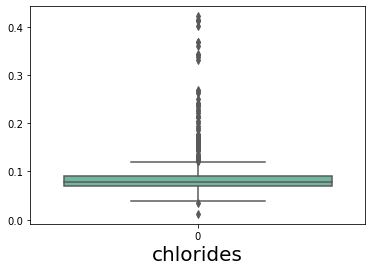

In [2430]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["chlorides"], palette="Set2", dodge=False)

plt.xlabel('chlorides', fontsize=20)

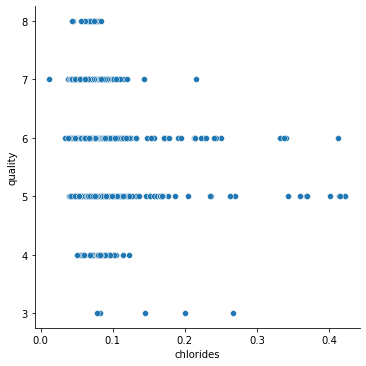

In [2431]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'chlorides', y='quality')

In [2432]:
# Calculate mean and std 
mu= df['chlorides'].mean()
print(mu)
b= df['chlorides'].std()
print(b)

0.08574895746455348
0.040154245968259665


Text(0.1, 250, '$\\mu=0.08571584241408185, b=0.04017278819747312$')

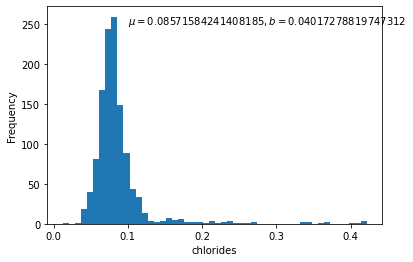

In [2433]:
# visualize by histogram
df['chlorides'].plot(kind ='hist', bins=50)
plt.xlabel('chlorides')
plt.text( 0.1,250,r'$\mu=0.08571584241408185, b=0.04017278819747312$')

In [2434]:
#to many outliers, so, we drop this column
df.drop(columns=['chlorides'], inplace=True)

In [2435]:
df.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.254514,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.254514,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.254514,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [2436]:
df.shape

(1199, 10)

# Column6: free sulfur dioxide

In [2437]:
#check the null values, zero values in this column
df['free sulfur dioxide'].unique()

array([11. , 25. , 15. , 17. , 13. ,  9. , 16. , 52. , 51. , 35. ,  6. ,
       29. , 23. , 10. , 21. ,  4. , 14. ,  8. , 22. , 40. ,  5. ,  3. ,
       12. , 30. , 33. , 50. , 19. , 20. , 27. , 18. , 28. , 34. , 42. ,
       37. ,  7. , 32. , 36. , 24. , 26. , 39. , 40.5, 68. , 31. , 38. ,
       43. , 47. ,  1. , 41. , 46. , 45. ,  2. ,  5.5, 53. , 57. , 48. ,
       72. , 55. , 66. ])

In [2438]:
#check the zero value
df['free sulfur dioxide'].all()

True

In [2439]:
#count the value of each datapoint
df['free sulfur dioxide'].value_counts()

6.0     93
5.0     69
15.0    59
12.0    54
9.0     53
16.0    51
10.0    50
7.0     50
17.0    45
11.0    44
13.0    44
8.0     43
14.0    38
18.0    38
21.0    35
3.0     35
4.0     33
19.0    28
26.0    27
24.0    26
20.0    25
23.0    24
27.0    23
28.0    18
29.0    18
25.0    17
34.0    17
32.0    16
22.0    16
31.0    13
30.0    13
35.0    12
33.0     9
36.0     8
38.0     6
40.0     5
39.0     4
41.0     4
37.0     3
48.0     3
42.0     3
52.0     3
51.0     3
45.0     3
43.0     3
50.0     2
1.0      2
68.0     1
57.0     1
47.0     1
66.0     1
2.0      1
46.0     1
55.0     1
40.5     1
5.5      1
53.0     1
72.0     1
Name: free sulfur dioxide, dtype: int64

Text(0.5, 0, 'free sulfur dioxide')

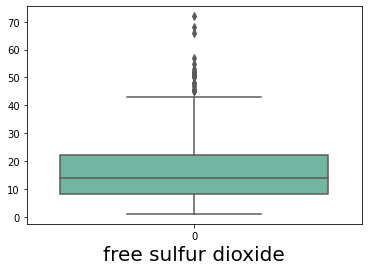

In [2440]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["free sulfur dioxide"], palette="Set2", dodge=False)

plt.xlabel('free sulfur dioxide', fontsize=20)

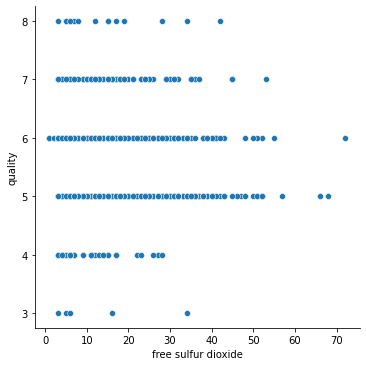

In [2441]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'free sulfur dioxide', y='quality')

In [2442]:
# Calculate mean and std 
mu= df['free sulfur dioxide'].mean()
print(mu)
b= df['free sulfur dioxide'].std()
print(b)

16.238532110091743
10.512663474875819


Text(20, 60, '$\\mu=16.258172673931266, b=10.526531788309626$')

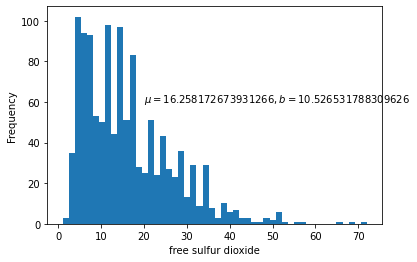

In [2443]:
# visualize by histogram
df['free sulfur dioxide'].plot(kind ='hist', bins=50)
plt.xlabel('free sulfur dioxide')
plt.text( 20,60,r'$\mu=16.258172673931266, b=10.526531788309626$')

In [2444]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['free sulfur dioxide'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['free sulfur dioxide'], 60,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [2445]:
# higher side 
higher_side = df['free sulfur dioxide'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['free sulfur dioxide'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
5       False
        ...  
1593     True
1594     True
1595     True
1597     True
1598    False
Name: free sulfur dioxide, Length: 1199, dtype: bool
(array([  12,   13,   14,   18,   30,   47,   48,   51,   67,   78,   80,
         93,  109,  119,  126,  127,  132,  133,  164,  173,  185,  195,
        222,  223,  245,  248,  249,  253,  261,  264,  271,  278,  292,
        305,  306,  307,  308,  309,  316,  327,  333,  352,  355,  362,
        365,  368,  369,  371,  372,  373,  383,  392,  413,  427,  441,
        443,  444,  455,  468,  473,  476,  504,  506,  516,  519,  530,
        586,  589,  592,  597,  605,  616,  617,  618,  623,  626,  630,
        631,  633,  645,  654,  655,  658,  659,  664,  692,  698,  699,
        703,  706,  709,  710,  717,  730,  737,  738,  752,  753,  762,
        763,  770,  772,  773,  775,  778,  779,  780,  783,  804,  816,
        819,  825,  827,  831,  832,  841,  842,  852,

In [2446]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (1024, 10)


Text(0.5, 0, 'free sulfur dioxide')

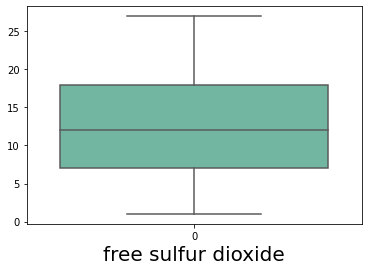

In [2447]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["free sulfur dioxide"], palette="Set2", dodge=False)

plt.xlabel('free sulfur dioxide', fontsize=20)

Text(0, 0.5, 'Density')

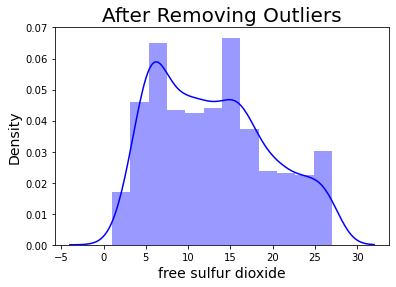

In [2448]:
# Visualize the boxplot after removing outliers
sns.distplot(df['free sulfur dioxide'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('free sulfur dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [2449]:
df.shape

(1024, 10)

# Column7: total sulfur dioxide

In [2450]:
#check the null values, zero values in this column
df['total sulfur dioxide'].unique()

array([ 34.,  67.,  54.,  60.,  40.,  59.,  21.,  18., 102.,  65.,  29.,
        56.,  71.,  37.,  23.,  11.,  35.,  16.,  82., 113.,  50.,  15.,
        30.,  87.,  46.,  14., 114.,  12.,  96.,  45.,  10.,  52., 112.,
        39.,  19.,  27.,  94.,  43.,  80., 119.,  73.,  51.,  61., 136.,
        31.,  24., 133., 106.,  22.,  36.,  64.,  47., 108., 111.,  62.,
        28.,  89.,  13.,  90.,  99.,  26.,  63., 105.,  20.,  88.,  86.,
       101.,  42.,  44.,   8.,  49.,  38., 110.,  85., 143., 144., 127.,
       126., 120.,  55.,  93.,  95.,  41., 121.,  58.,  72.,  81.,  33.,
        53.,  48.,  70.,  25.,  98.,  32.,  75.,  78.,  77., 122.,  66.,
        17., 116., 149.,  57., 103., 104.,  84.,  68., 148.,   9., 125.,
        74.,  92., 130.,   7., 115.,   6.,  79.,  69.,  91., 100., 147.])

In [2451]:
#check the zero value
df['total sulfur dioxide'].all()

True

In [2452]:
#count the value of each datapoint
df['total sulfur dioxide'].value_counts()

28.0     32
18.0     26
14.0     26
13.0     25
20.0     24
         ..
95.0      1
136.0     1
148.0     1
133.0     1
79.0      1
Name: total sulfur dioxide, Length: 121, dtype: int64

Text(0.5, 0, 'total sulfur dioxide')

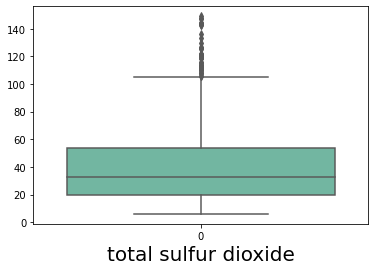

In [2453]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["total sulfur dioxide"], palette="Set2", dodge=False)

plt.xlabel('total sulfur dioxide', fontsize=20)

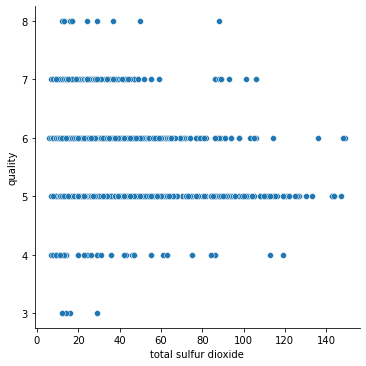

In [2454]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'total sulfur dioxide', y='quality')

In [2455]:
# Calculate mean and std 
mu= df['total sulfur dioxide'].mean()
print(mu)
b= df['total sulfur dioxide'].std()
print(b)

41.4892578125
28.817385763194547


Text(40, 60, '$\\mu=41.4892578125, b=28.817385763194547$')

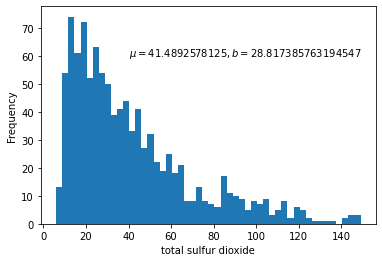

In [2456]:
# visualize by histogram
df['total sulfur dioxide'].plot(kind ='hist', bins=50)
plt.xlabel('total sulfur dioxide')
plt.text( 40,60,r'$\mu=41.4892578125, b=28.817385763194547$')

In [2457]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['total sulfur dioxide'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['total sulfur dioxide'], 60,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [2458]:
# higher side 
higher_side = df['total sulfur dioxide'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['total sulfur dioxide'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
5       False
        ...  
1585    False
1587    False
1590    False
1591    False
1598    False
Name: total sulfur dioxide, Length: 1024, dtype: bool
(array([  8,  15,  23,  25,  30,  35,  38,  47,  56,  57,  60,  61,  63,
        67,  70,  71,  81,  83,  84,  90,  93,  94,  97, 102, 103, 106,
       107, 111, 113, 116, 117, 129, 133, 136, 137, 138, 140, 142, 144,
       149, 150, 155, 159, 161, 165, 168, 176, 181, 182, 195, 205, 213,
       219, 220, 221, 224, 229, 242, 245, 249, 258, 267, 268, 269, 271,
       310, 323, 340, 347, 349, 350, 354, 357, 358, 373, 376, 377, 383,
       386, 396, 421, 423, 424, 427, 429, 435, 438, 450, 456, 465, 470,
       471, 472, 474, 475, 481, 484, 485, 488, 489, 490, 491, 498, 500,
       528, 534, 538, 540, 541, 549, 554, 555, 557, 563, 564, 576, 580,
       606, 619, 662, 707, 714, 715, 723, 726, 743, 747, 756, 758, 769,
       774, 777, 782, 787, 808, 818, 829, 830, 836, 839, 845, 8

In [2459]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (866, 10)


Text(0.5, 0, 'total sulfur dioxide')

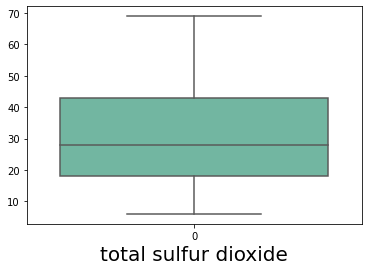

In [2460]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["total sulfur dioxide"], palette="Set2", dodge=False)

plt.xlabel('total sulfur dioxide', fontsize=20)

Text(0, 0.5, 'Density')

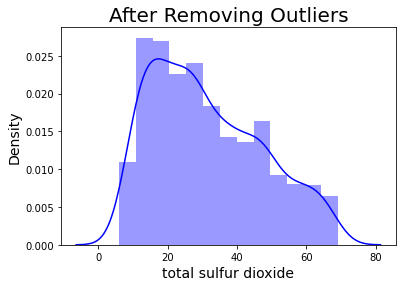

In [2461]:
# Visualize the boxplot after removing outliers
sns.distplot(df['total sulfur dioxide'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('total sulfur dioxide', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [2462]:
df.shape

(866, 10)

# Column8: density

In [2463]:
#check the null values, zero values in this column
df['density'].unique()

array([0.9978 , 0.9968 , 0.997  , 0.998  , 0.9964 , 0.9946 , 0.9959 ,
       0.9943 , 0.9974 , 0.9969 , 0.9966 , 0.9955 , 0.9962 , 0.9972 ,
       0.9957 , 0.9986 , 0.9975 , 0.9976 , 0.9958 , 0.9971 , 0.9956 ,
       0.9967 , 0.9961 , 0.9965 , 0.9963 , 0.996  , 0.9988 , 0.9952 ,
       0.9916 , 0.9954 , 0.9953 , 0.99695, 0.99545, 0.99615, 0.99585,
       0.99685, 0.99525, 0.99815, 0.99745, 0.9984 , 0.99625, 0.99675,
       0.9983 , 0.9985 , 0.99965, 0.99575, 1.00025, 0.9973 , 0.9987 ,
       0.99935, 0.99735, 0.9991 , 0.9979 , 0.9994 , 1.0001 , 0.99855,
       0.9993 , 0.99845, 0.9998 , 0.9989 , 1.0015 , 0.9981 , 0.9948 ,
       0.9982 , 1.0004 , 0.9949 , 0.9996 , 0.9951 , 0.9934 , 1.0006 ,
       0.9947 , 0.9977 , 1.0026 , 0.995  , 1.     , 0.999  , 1.0002 ,
       0.9917 , 0.9997 , 0.9992 , 0.9921 , 0.99768, 0.99782, 0.99761,
       0.99803, 0.99785, 0.99656, 0.99738, 0.99701, 0.99888, 0.99668,
       0.99727, 0.99612, 0.99788, 0.99676, 0.99732, 0.99639, 0.99531,
       0.99786, 0.99

In [2464]:
#check the zero value
df['density'].all()

True

In [2465]:
#count the value of each datapoint
df['density'].value_counts()

0.99760    21
0.99720    21
0.99680    20
0.99620    17
0.99800    17
           ..
0.99708     1
0.99564     1
0.99976     1
0.99332     1
0.99542     1
Name: density, Length: 339, dtype: int64

Text(0.5, 0, 'density')

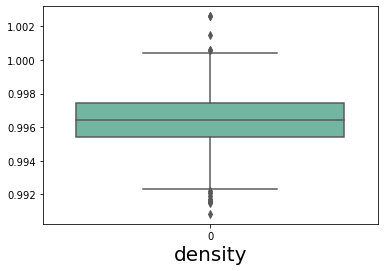

In [2466]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["density"], palette="Set2", dodge=False)

plt.xlabel('density', fontsize=20)

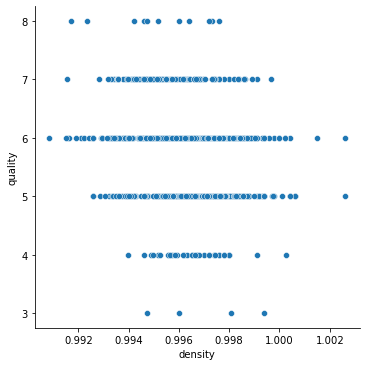

In [2467]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'density', y='quality')

In [2468]:
# Calculate mean and std 
mu= df['density'].mean()
print(mu)
b= df['density'].std()
print(b)

0.9964036836027721
0.0016426176590325261


Text(1, 40, '$\\mu=0.9964036836027721, b=0.0016426176590325261$')

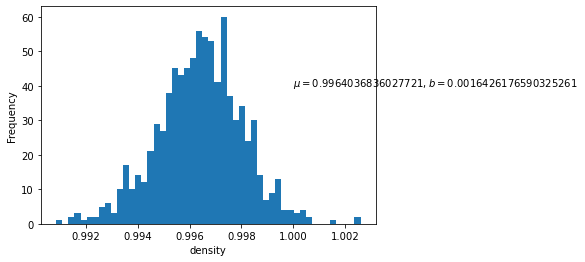

In [2469]:
# visualize by histogram
df['density'].plot(kind ='hist', bins=50)
plt.xlabel('density')
plt.text( 1,40,r'$\mu=0.9964036836027721, b=0.0016426176590325261$')

In [2470]:
df.drop(columns=['density'],inplace=True)

In [2471]:
df.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.254514,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.254514,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.040000,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.560000,17.0,60.0,3.16,0.58,9.8,6
5,7.4,0.66,0.254514,13.0,40.0,3.51,0.56,9.4,5


In [2472]:
df.shape

(866, 9)

# Column9: pH

In [2473]:
#check the null values, zero values in this column
df['pH'].unique()

array([3.51, 3.2 , 3.26, 3.16, 3.3 , 3.39, 3.36, 3.28, 3.58, 3.11, 3.38,
       3.04, 3.17, 3.43, 3.34, 3.47, 3.46, 3.4 , 3.42, 3.23, 3.21, 3.48,
       3.25, 3.15, 3.41, 3.44, 3.32, 3.31, 3.52, 3.45, 3.29, 3.33, 3.19,
       3.07, 3.37, 3.49, 3.68, 3.53, 3.  , 3.35, 3.54, 3.57, 3.22, 3.24,
       3.14, 3.61, 3.6 , 3.69, 3.12, 3.05, 3.67, 3.18, 3.13, 3.27, 3.55,
       3.1 , 3.08, 3.06, 3.5 , 3.03, 3.09, 3.72, 3.56, 2.89, 2.94, 3.9 ,
       3.66, 2.99, 3.71, 3.59, 3.62, 3.02, 3.78, 3.01, 3.7 , 4.01, 2.88])

In [2474]:
#check the zero value
df['pH'].all()

True

In [2475]:
#count the value of each datapoint
df['pH'].value_counts()

3.36    35
3.39    30
3.38    29
3.34    29
3.31    28
        ..
2.88     1
3.70     1
3.01     1
3.90     1
2.89     1
Name: pH, Length: 77, dtype: int64

Text(0.5, 0, 'pH')

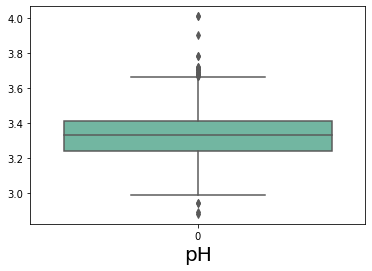

In [2476]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["pH"], palette="Set2", dodge=False)

plt.xlabel('pH', fontsize=20)

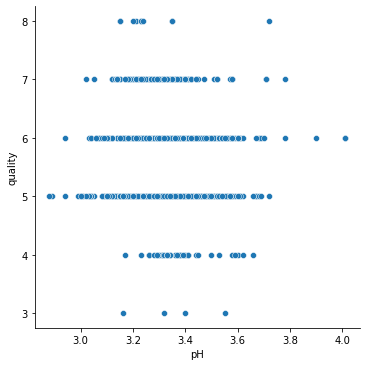

In [2477]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'pH', y='quality')

In [2478]:
# Calculate mean and std 
mu= df['pH'].mean()
print(mu)
b= df['pH'].std()
print(b)

3.331512702078525
0.1428047632836713


Text(3.5, 80, '$\\mu=3.331512702078525, b=0.1428047632836713$')

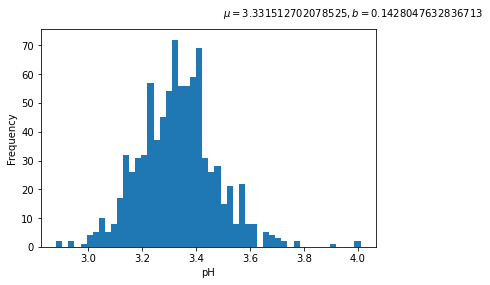

In [2479]:
# visualize by histogram
df['pH'].plot(kind ='hist', bins=50)
plt.xlabel('pH')
plt.text( 3.5,80,r'$\mu=3.331512702078525, b=0.1428047632836713$')

In [2480]:
df.drop(columns=['pH'],inplace=True)


In [2481]:
df.shape

(866, 8)

# Column10: sulphates

In [2482]:
#check the null values, zero values in this column
df['sulphates'].unique()

array([0.56, 0.68, 0.65, 0.58, 0.46, 0.47, 0.57, 0.54, 0.52, 1.56, 1.28,
       0.5 , 1.08, 0.91, 0.53, 0.63, 0.59, 0.55, 0.6 , 0.73, 0.51, 0.9 ,
       1.2 , 0.74, 0.64, 0.62, 0.39, 0.79, 0.95, 1.14, 0.78, 0.61, 0.48,
       0.93, 0.67, 0.92, 0.82, 0.77, 1.59, 0.33, 0.49, 0.88, 0.86, 0.71,
       0.7 , 1.09, 0.96, 0.8 , 0.72, 0.69, 0.83, 0.87, 0.75, 0.89, 0.98,
       1.13, 1.04, 0.76, 0.84, 1.06, 0.66, 1.05, 0.42, 1.02, 0.81, 1.36,
       1.17, 0.45, 0.44, 0.43, 1.18, 0.99, 0.85, 1.34, 1.16, 1.1 , 0.94,
       0.4 , 0.37, 1.03, 0.97])

In [2483]:
#check the zero value
df['sulphates'].all()

True

In [2484]:
#count the value of each datapoint
df['sulphates'].value_counts()

0.60    40
0.56    39
0.58    38
0.54    34
0.59    32
        ..
1.09     1
1.16     1
0.97     1
1.34     1
1.28     1
Name: sulphates, Length: 81, dtype: int64

Text(0.5, 0, 'sulphates')

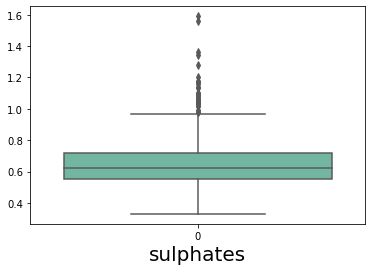

In [2485]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["sulphates"], palette="Set2", dodge=False)

plt.xlabel('sulphates', fontsize=20)

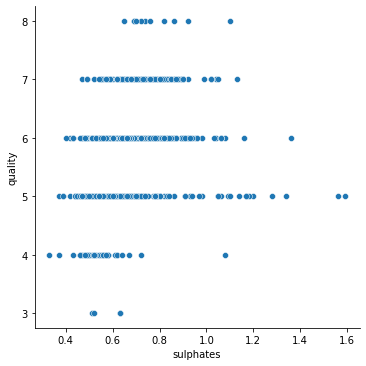

In [2486]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'sulphates', y='quality')

In [2487]:
# Calculate mean and std 
mu= df['sulphates'].mean()
print(mu)
b= df['sulphates'].std()
print(b)

0.6518706697459575
0.14948299926539305


Text(0.75, 65, '$\\mu=0.6505843293492695, b=0.14766058196712542$')

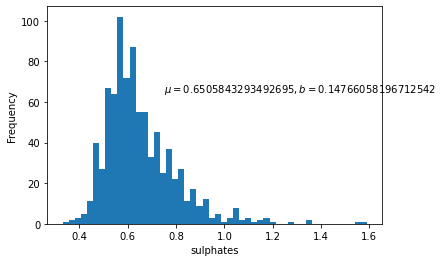

In [2488]:
# visualize by histogram
df['sulphates'].plot(kind ='hist', bins=50)
plt.xlabel('sulphates')
plt.text( 0.75,65,r'$\mu=0.6505843293492695, b=0.14766058196712542$')

In [2489]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['sulphates'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['sulphates'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [2490]:
# higher side 
higher_side = df['sulphates'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['sulphates'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
5       False
        ...  
1585    False
1587    False
1590    False
1591    False
1598    False
Name: sulphates, Length: 866, dtype: bool
(array([ 10,  11,  13,  28,  46,  51,  65,  73,  85,  89, 127, 128, 179,
       181, 186, 187, 189, 219, 233, 236, 237, 238, 247, 248, 249, 282,
       302, 310, 340, 341, 381, 392, 472, 540, 602, 608, 609, 633, 729,
       730, 747, 750, 815, 851], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
5       False
        ...  
1585    False
1587    False
1590    False
1591    False
1598    False
Name: sulphates, Length: 866, dtype: bool
(array([90], dtype=int64),)
old Shape:  (866, 8)


In [2491]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (821, 8)


Text(0.5, 0, 'sulphates')

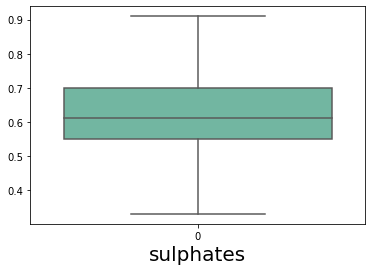

In [2492]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["sulphates"], palette="Set2", dodge=False)

plt.xlabel('sulphates', fontsize=20)

Text(0, 0.5, 'Density')

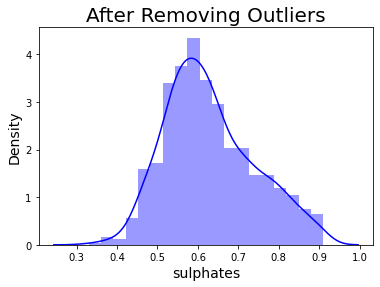

In [2493]:
# Visualize the boxplot after removing outliers
sns.distplot(df['sulphates'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('sulphates', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Column11: alcohol

In [2494]:
#check the null values, zero values in this column
df['alcohol'].unique()

array([ 9.4       ,  9.8       , 10.        ,  9.5       ,  9.2       ,
        9.9       ,  9.        ,  9.7       ,  9.3       , 10.6       ,
        9.6       , 10.8       , 10.5       , 10.9       , 10.7       ,
       10.3       , 10.1       , 10.2       , 10.4       , 14.        ,
        9.1       , 11.5       , 12.4       , 11.        , 12.8       ,
       12.6       , 11.7       , 12.5       , 11.3       , 12.3       ,
        8.7       , 11.4       , 11.6       , 11.2       , 11.1       ,
       13.3       , 13.4       ,  8.4       , 12.2       , 12.7       ,
       12.        , 11.9       , 12.1       , 11.8       , 13.2       ,
       12.9       , 13.1       , 13.5       , 13.6       , 13.        ,
        9.55      , 11.95      ,  9.95      ,  9.23333333,  9.25      ,
        9.05      , 10.55      ])

In [2495]:
#check the zero value
df['alcohol'].all()

True

In [2496]:
#count the value of each datapoint
df['alcohol'].value_counts()

9.500000     56
9.400000     42
10.000000    41
9.600000     36
9.800000     36
9.200000     35
10.500000    32
11.000000    30
9.300000     29
9.700000     27
10.200000    25
10.400000    24
10.900000    24
10.800000    23
10.100000    23
11.200000    21
11.300000    20
10.300000    19
11.100000    19
11.500000    19
11.400000    18
10.700000    17
12.500000    16
11.700000    15
11.800000    14
10.600000    14
9.900000     13
11.900000    12
12.800000    11
12.000000    11
9.000000     10
12.400000     9
12.100000     9
9.100000      9
11.600000     9
12.200000     8
12.300000     8
12.600000     6
14.000000     5
12.700000     4
12.900000     4
13.300000     2
9.550000      2
9.233333      1
11.950000     1
13.000000     1
8.700000      1
9.050000      1
13.100000     1
10.550000     1
13.500000     1
13.400000     1
13.600000     1
13.200000     1
9.950000      1
8.400000      1
9.250000      1
Name: alcohol, dtype: int64

Text(0.5, 0, 'alcohol')

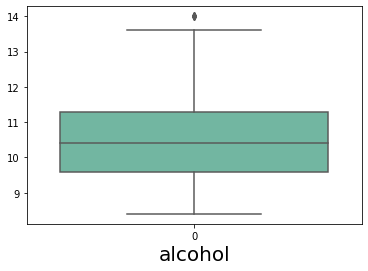

In [2497]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["alcohol"], palette="Set2", dodge=False)

plt.xlabel('alcohol', fontsize=20)

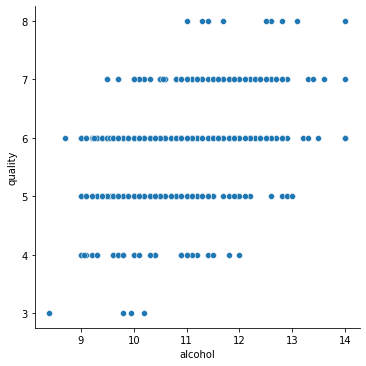

In [2498]:
# Visualize by using relational plot 
sns.relplot(data= df, x = 'alcohol', y='quality')

In [2499]:
# Calculate mean and std 
mu= df['alcohol'].mean()
print(mu)
b= df['alcohol'].std()
print(b)

10.538225740966297
1.077356913295945


Text(9.5, 55, '$\\mu=10.502149851000421, b=1.0359758397634797$')

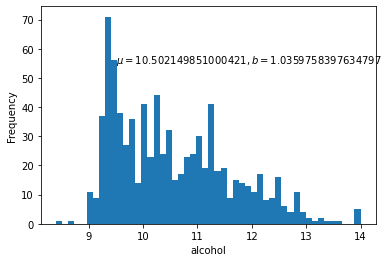

In [2500]:
# visualize by histogram
df['alcohol'].plot(kind ='hist', bins=50)
plt.xlabel('alcohol')
plt.text(9.5,55,r'$\mu=10.502149851000421, b=1.0359758397634797$')

In [2501]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['alcohol'], 50,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['alcohol'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [2502]:
# higher side 
higher_side = df['alcohol'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['alcohol'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
5       False
        ...  
1585    False
1587    False
1590    False
1591    False
1598    False
Name: alcohol, Length: 821, dtype: bool
(array([ 71, 128, 169, 208, 220, 221, 233, 256, 268, 311, 329, 366, 378,
       419, 431, 468, 470, 473, 506, 507, 532, 542, 543, 544, 550, 553,
       564, 579, 610, 631, 643, 656], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
5       False
        ...  
1585    False
1587    False
1590    False
1591    False
1598    False
Name: alcohol, Length: 821, dtype: bool
(array([ 10,  49,  53,  78, 114, 171, 223, 227, 248, 258, 294, 338, 774],
      dtype=int64),)
old Shape:  (821, 8)


In [2503]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (776, 8)


Text(0.5, 0, 'alcohol')

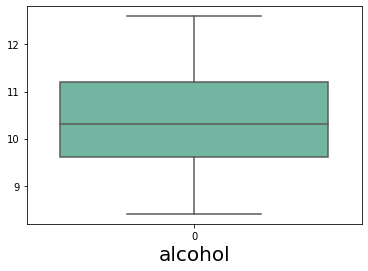

In [2504]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["alcohol"], palette="Set2", dodge=False)

plt.xlabel('alcohol', fontsize=20)

Text(0, 0.5, 'Density')

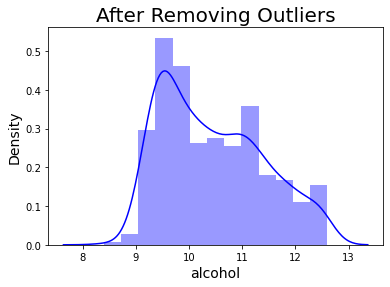

In [2505]:
# Visualize the boxplot after removing outliers
sns.distplot(df['alcohol'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('alcohol', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [2506]:
#count the value of each datapoint
df['alcohol'].value_counts()

9.500000     56
9.400000     42
10.000000    39
9.800000     36
9.600000     34
9.200000     33
10.500000    31
11.000000    30
9.300000     29
9.700000     27
10.900000    24
10.200000    24
10.800000    23
10.400000    23
10.100000    23
11.200000    21
11.300000    20
11.100000    19
10.300000    19
11.400000    18
11.500000    18
10.700000    17
12.500000    16
11.700000    15
11.800000    14
10.600000    14
9.900000     13
11.900000    12
12.000000    11
9.100000      9
12.400000     9
11.600000     9
12.100000     9
12.300000     8
12.200000     8
9.000000      7
12.600000     6
9.550000      2
8.400000      1
9.950000      1
10.550000     1
9.233333      1
9.050000      1
8.700000      1
11.950000     1
9.250000      1
Name: alcohol, dtype: int64

In [2507]:
#replace the small value with mean
df['alcohol']=df['alcohol'].replace(8.40, df['alcohol'].mean())
df['alcohol']=df['alcohol'].replace(8.50, df['alcohol'].mean())
df['alcohol']=df['alcohol'].replace(8.70, df['alcohol'].mean())

In [2508]:
#count the value of each datapoint
df['alcohol'].value_counts()

9.500000     56
9.400000     42
10.000000    39
9.800000     36
9.600000     34
9.200000     33
10.500000    31
11.000000    30
9.300000     29
9.700000     27
10.900000    24
10.200000    24
10.400000    23
10.800000    23
10.100000    23
11.200000    21
11.300000    20
11.100000    19
10.300000    19
11.500000    18
11.400000    18
10.700000    17
12.500000    16
11.700000    15
10.600000    14
11.800000    14
9.900000     13
11.900000    12
12.000000    11
11.600000     9
12.400000     9
12.100000     9
9.100000      9
12.300000     8
12.200000     8
9.000000      7
12.600000     6
9.550000      2
10.447330     1
9.950000      1
9.050000      1
10.550000     1
10.444695     1
11.950000     1
9.233333      1
9.250000      1
Name: alcohol, dtype: int64

Text(0, 0.5, 'Density')

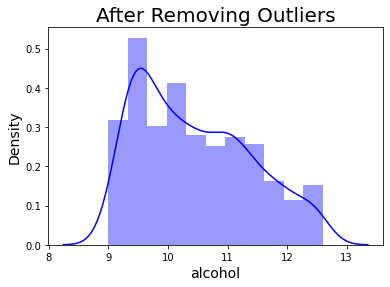

In [2509]:
# Visualize the boxplot after removing outliers
sns.distplot(df['alcohol'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('alcohol', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Target Column: quality

In [2510]:
#check the null values, zero values in this column
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [2511]:
#check the zero value
df['quality'].all()

True

In [2512]:
#count the value of each datapoint
df['quality'].value_counts()

6    338
5    296
7    100
4     32
8      6
3      4
Name: quality, dtype: int64

Text(0.5, 0, 'quality')

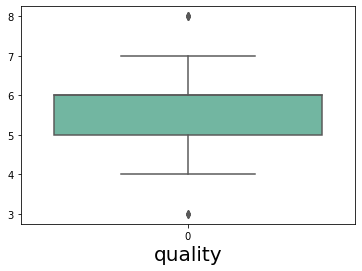

In [2513]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["quality"], palette="Set2", dodge=False)

plt.xlabel('quality', fontsize=20)

In [2514]:
# Calculate mean and std 
mu= df['quality'].mean()
print(mu)
b= df['quality'].std()
print(b)

5.664948453608248
0.8007146791083243


Text(9.5, 95, '$\\mu=5.597376387487387, b=0.7761294660611415$')

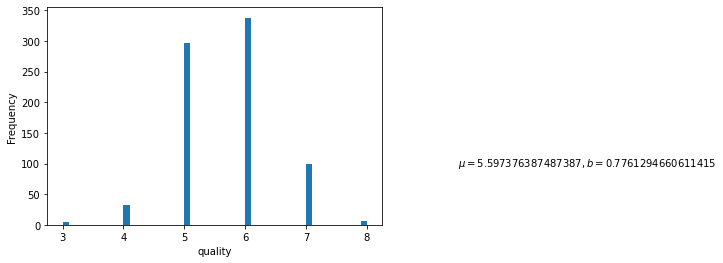

In [2515]:
# visualize by histogram
df['quality'].plot(kind ='hist', bins=50)
plt.xlabel('quality')
plt.text(9.5,95,r'$\mu=5.597376387487387, b=0.7761294660611415$')

In [2520]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['quality'], 33,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['quality'], 70,
                   interpolation = 'midpoint')
iqr = q3 - q1

In [2521]:
# higher side 
higher_side = df['quality'] >= (q3+1.5*iqr)
print("Higher:", higher_side)
print(np.where(higher_side))
high = np.where(higher_side)
 
# lower side 
lower_side = df['quality'] <= (q1-1.5*iqr)
print("Lower:", lower_side)
low = np.where(lower_side)
print(np.where(lower_side))
print("old Shape: ", df.shape)

Higher: 0       False
1       False
2       False
3       False
5       False
        ...  
1585    False
1587    False
1590    False
1591    False
1598    False
Name: quality, Length: 766, dtype: bool
(array([], dtype=int64),)
Lower: 0       False
1       False
2       False
3       False
5       False
        ...  
1585    False
1587    False
1590    False
1591    False
1598    False
Name: quality, Length: 766, dtype: bool
(array([213, 641, 689, 710], dtype=int64),)
old Shape:  (766, 8)


In [2522]:
#removing the outliers
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape: ", df.shape)

New Shape:  (762, 8)


Text(0.5, 0, 'quality')

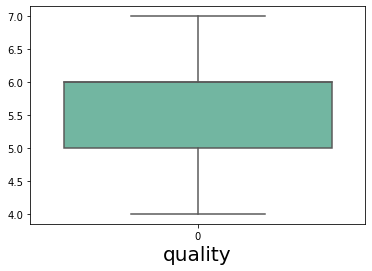

In [2523]:
# Visualize the boxplot after removing outliers
ax = sns.boxplot(data=df["quality"], palette="Set2", dodge=False)

plt.xlabel('quality', fontsize=20)

Text(0, 0.5, 'Density')

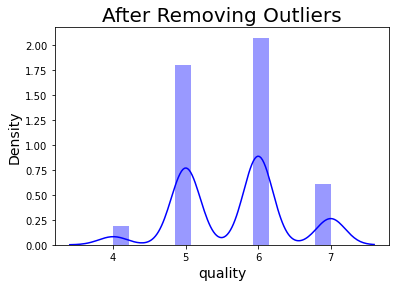

In [2524]:
# Visualize the boxplot after removing outliers
sns.distplot(df['quality'], color='blue', rug = False, hist = True, kde = True)
plt.title('After Removing Outliers', fontsize=20)
plt.xlabel('quality', fontsize=14)
plt.ylabel('Density', fontsize=14)

In [2525]:
df['quality'].value_counts()

6    338
5    293
7    100
4     31
Name: quality, dtype: int64

In [2526]:
df.shape

(762, 8)

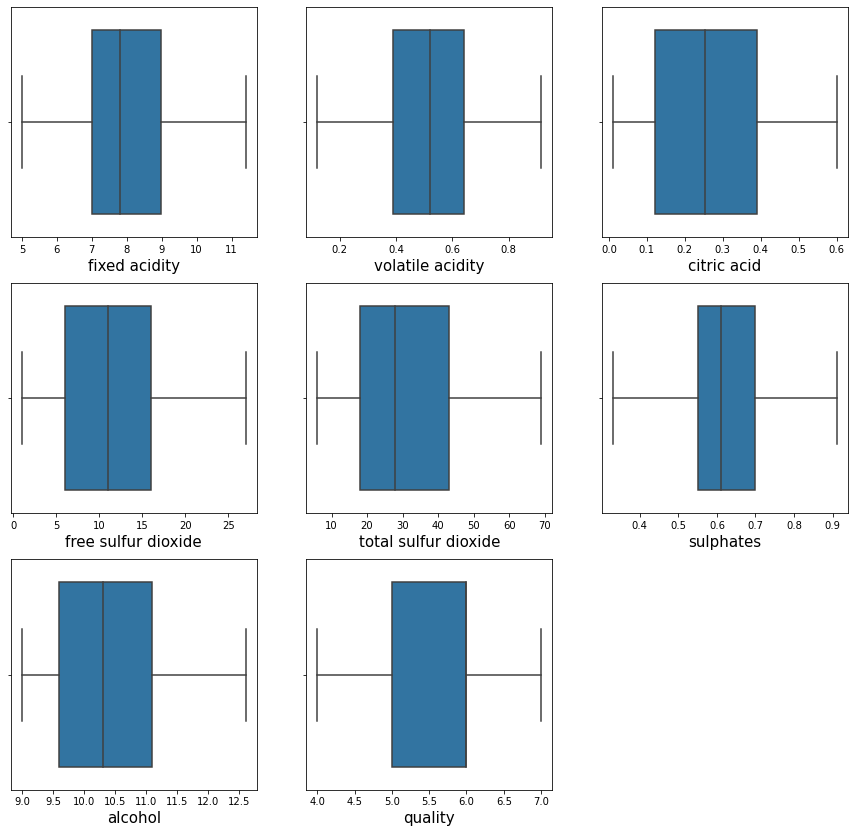

In [2527]:
#visaulize the columns by using boxplot
plt.figure(figsize =(15,50))
graph=1
for column in df:
    if graph<30:
        ax=plt.subplot(10,3,graph)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=15)
    graph+=1
plt.show() 

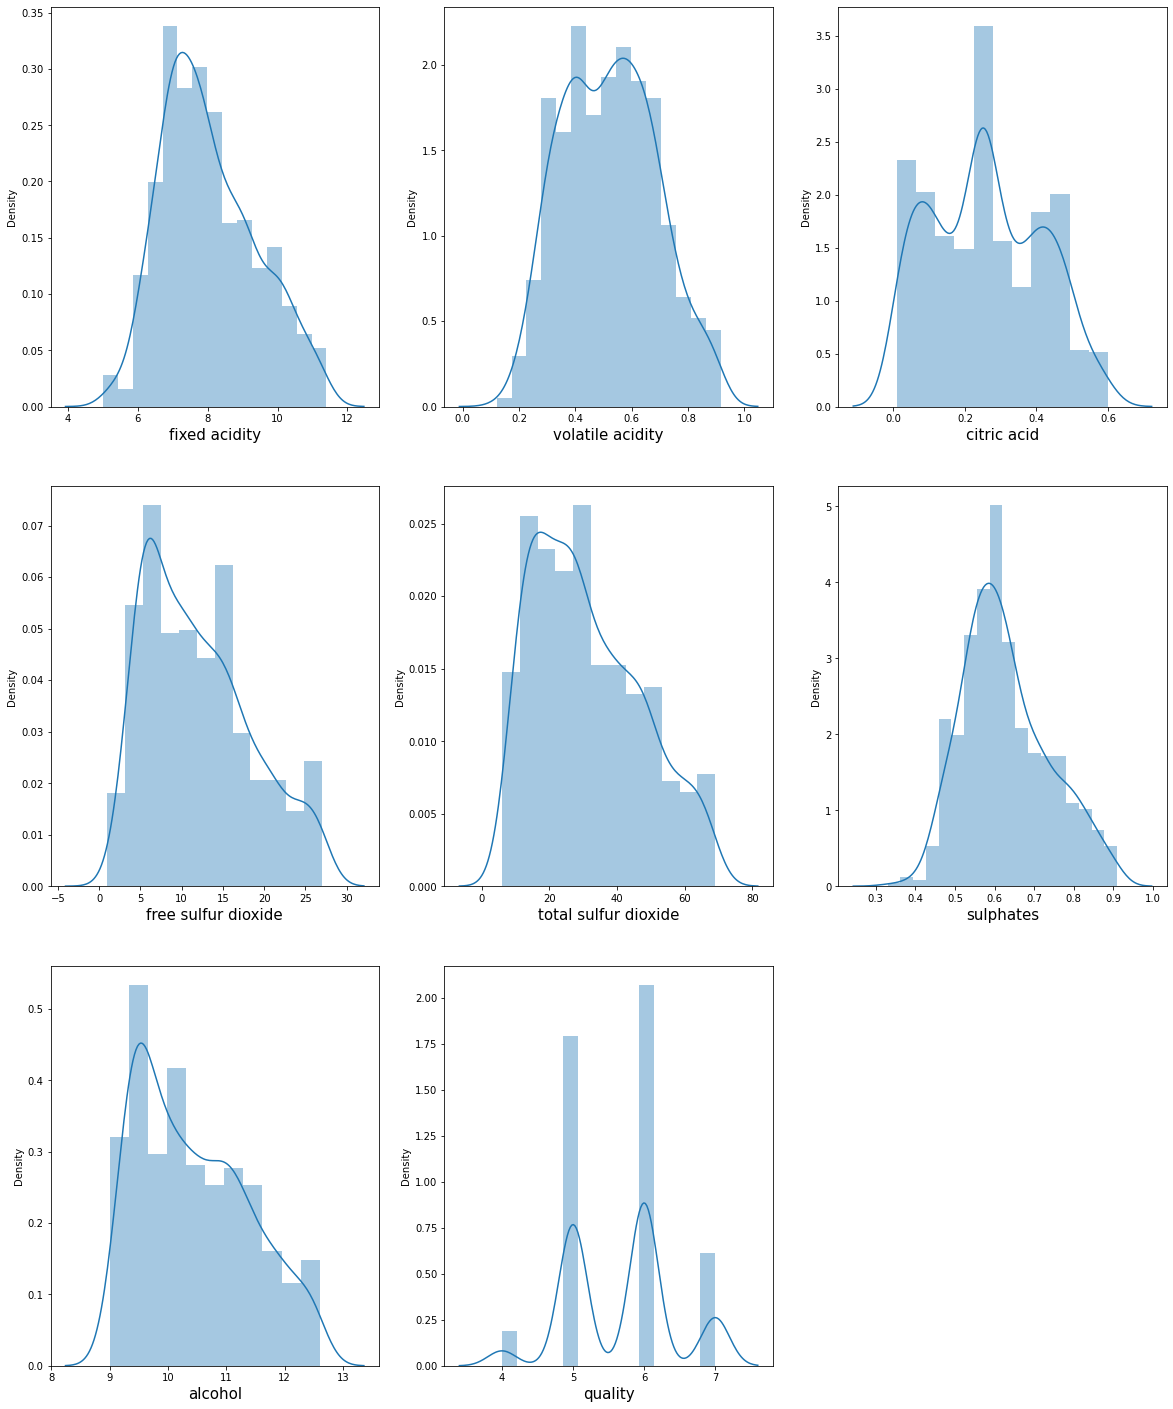

In [2528]:
#visaulize the columns by using distplot
plt.figure(figsize=(20,25), facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=15)
    plotnumber+=1
plt.show() 

In [2529]:
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 6.5:
        reviews.append('0')
    elif i > 6.5:
        reviews.append('1')
    
df['Reviews'] = reviews

In [2530]:
df['Reviews']

0       0
1       0
2       0
3       0
5       0
       ..
1585    0
1587    0
1590    0
1591    0
1598    0
Name: Reviews, Length: 762, dtype: object

In [2531]:
df['Reviews'].value_counts()

0    662
1    100
Name: Reviews, dtype: int64

In [2532]:
df.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.254514,11.0,34.0,0.56,9.4,5,0
1,7.8,0.88,0.254514,25.0,67.0,0.68,9.8,5,0
2,7.8,0.76,0.040000,15.0,54.0,0.65,9.8,5,0
3,11.2,0.28,0.560000,17.0,60.0,0.58,9.8,6,0
5,7.4,0.66,0.254514,13.0,40.0,0.56,9.4,5,0


In [2533]:
df.drop(columns=['quality'], inplace=True)

In [2534]:
df.head()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,Reviews
0,7.4,0.70,0.254514,11.0,34.0,0.56,9.4,0
1,7.8,0.88,0.254514,25.0,67.0,0.68,9.8,0
2,7.8,0.76,0.040000,15.0,54.0,0.65,9.8,0
3,11.2,0.28,0.560000,17.0,60.0,0.58,9.8,0
5,7.4,0.66,0.254514,13.0,40.0,0.56,9.4,0


In [2535]:
#split x and y
x = df.drop(['Reviews'], axis=1)
y=df.Reviews

In [2536]:
#scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.47516109,  1.08306557, -0.03076829, ...,  0.17002879,
        -0.62528267, -1.09832596],
       [-0.17758743,  2.16640759, -0.03076829, ...,  2.25261237,
         0.47298562, -0.67764502],
       [-0.17758743,  1.44417958, -1.43221935, ...,  1.43220066,
         0.19841855, -0.67764502],
       ...,
       [-1.29348866,  0.18028056, -0.71357266, ...,  0.23313739,
         1.75429862,  1.21541917],
       [-1.96302939,  1.32380824, -1.10556176, ..., -0.33483995,
        -0.62528267,  1.21541917],
       [-1.5166689 , -1.26417546,  1.37703592, ...,  0.67489754,
         0.28994091,  0.58439777]])

In [2537]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=42)

In [2538]:
y_train.head()

293     0
808     0
1531    0
1514    0
1486    0
Name: Reviews, dtype: object

#  Logistic Regression

In [2539]:
#Model instantiating and training
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [2540]:
#Train the model
log_reg.score(x_train, y_train)

0.882661996497373

In [2541]:
#Let's check how well model fits the test data
log_reg.score(x_test,y_test)

0.8795811518324608

In [2542]:
#make predictions
pred_test= log_reg.predict(x_test)

In [2543]:
#Cross validation score for logistic regression
lr_cv = log_reg.predict(x_test)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
lr_acc= accuracy_score(y_test,lr_cv)
for i in range (2,10):
    lr_score= cross_val_score(log_reg,x,y,cv=i)
    lr_sc=lr_score.mean()
    print( 'At CV ------',i)
    print("CV Score is -----",lr_sc*100)
    print("Accuracy Score is -----",lr_acc*100)
    print("\n")

At CV ------ 2
CV Score is ----- 84.51443569553805
Accuracy Score is ----- 87.95811518324608


At CV ------ 3
CV Score is ----- 87.27034120734908
Accuracy Score is ----- 87.95811518324608


At CV ------ 4
CV Score is ----- 86.8744833287407
Accuracy Score is ----- 87.95811518324608


At CV ------ 5
CV Score is ----- 87.39938080495357
Accuracy Score is ----- 87.95811518324608


At CV ------ 6
CV Score is ----- 87.27034120734908
Accuracy Score is ----- 87.95811518324608


At CV ------ 7
CV Score is ----- 87.6644337653512
Accuracy Score is ----- 87.95811518324608


At CV ------ 8
CV Score is ----- 87.79879385964912
Accuracy Score is ----- 87.95811518324608


At CV ------ 9
CV Score is ----- 87.66417678182383
Accuracy Score is ----- 87.95811518324608




# KNeighborsClassifier

In [2544]:
Classifier = KNeighborsClassifier(n_neighbors=5)
Classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [2545]:
Classifier.score(x_train,y_train)

0.8984238178633975

In [2546]:
Classifier.score(x_test,y_test)

0.8795811518324608

In [2547]:
from sklearn.metrics import confusion_matrix, classification_report

In [2548]:
knn = KNeighborsClassifier()

In [2549]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [2550]:
y_pred = knn.predict(x_test)

In [2551]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[159,  10],
       [ 13,   9]], dtype=int64)

In [2552]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       169
           1       0.47      0.41      0.44        22

    accuracy                           0.88       191
   macro avg       0.70      0.67      0.69       191
weighted avg       0.87      0.88      0.88       191



In [2553]:
#cross validation score to check if the model is overfitting
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_scaled,y,cv=5)

array([0.87581699, 0.8496732 , 0.84868421, 0.78289474, 0.89473684])

In [2554]:
cross_val_score(KNeighborsClassifier(),x_scaled,y,cv=5).mean()

0.8503611971104231

# GridsearchCV

In [2555]:
from sklearn.model_selection import GridSearchCV

In [2556]:
param_grid = {'algorithm':['kdtree','brute'], 'leaf_size':[10,11,14,15,18,20,25], 'n_neighbors':[3,5,7,9,11,13]}
gridsearch = GridSearchCV(estimator=knn, param_grid= param_grid)
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kdtree', 'brute'],
                         'leaf_size': [10, 11, 14, 15, 18, 20, 25],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [2557]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 10, 'n_neighbors': 13}

In [2558]:
knn = KNeighborsClassifier(algorithm = 'brute', leaf_size = 10, n_neighbors = 5)

In [2559]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=10)

In [2560]:
y_pred = knn.predict(x_test)


In [2561]:
cfm = confusion_matrix(y_test,y_pred)
cfm

array([[159,  10],
       [ 13,   9]], dtype=int64)

In [2562]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       169
           1       0.47      0.41      0.44        22

    accuracy                           0.88       191
   macro avg       0.70      0.67      0.69       191
weighted avg       0.87      0.88      0.88       191



# SVM

In [2563]:
from sklearn.svm import SVC

In [2564]:
svc = SVC()

In [2565]:
svc.fit(x_train,y_train)

SVC()

In [2566]:
svc.score(x_train,y_train)

0.8949211908931699

In [2567]:
svc.score(x_test,y_test)

0.9109947643979057

In [2568]:
y_pred = svc.predict(x_test)

In [2569]:
print('\n Accuracy Score---', accuracy_score(y_test, y_pred))


 Accuracy Score--- 0.9109947643979057


In [2570]:
cf = confusion_matrix(y_test, y_pred)
cf

array([[168,   1],
       [ 16,   6]], dtype=int64)

In [2571]:
print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       169
           1       0.86      0.27      0.41        22

    accuracy                           0.91       191
   macro avg       0.89      0.63      0.68       191
weighted avg       0.91      0.91      0.89       191



# Plot ROC/AUC for multiple models

In [2572]:
log_reg = LogisticRegression()
dt = DecisionTreeClassifier()
rf= RandomForestClassifier()
knn = KNeighborsClassifier()

In [2573]:
log_reg.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
knn.fit(x_train,y_train)
print("all models are trained")

all models are trained


In [2574]:
log_reg.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
knn.score(x_test,y_test)
print("all models score are captured")

all models score are captured


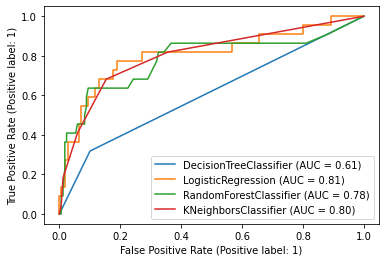

In [2575]:
#how well out model works on test data
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(log_reg,x_test,y_test, ax= disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax= disp.ax_)
plot_roc_curve(knn,x_test,y_test, ax= disp.ax_)
plt.show()

# RandomForestClassifier

In [2576]:
rf= RandomForestClassifier()

In [2577]:
params = {'n_estimators':[13,15],
         'criterion':['entropy'],
         'max_depth':[10,15],
         'min_samples_split':[10,11],
         'min_samples_leaf':[5,6]}

In [2578]:
grd = GridSearchCV(rf, param_grid=params)
grd.fit(x_train,y_train)
print('best_param - ', grd.best_params_)

best_param -  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 13}


In [2579]:
#Check the accuarcy of our model
clf = grd.best_estimator_
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
rf_cfm = confusion_matrix(y_test, y_pred)
print('\n conf_mat -- ', '\n', rf_cfm)
print('\n Accuracy Score---', accuracy_score(y_test, y_pred))


 conf_mat --  
 [[165   4]
 [ 13   9]]

 Accuracy Score--- 0.9109947643979057


In [2580]:
#To check recall
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       169
           1       0.69      0.41      0.51        22

    accuracy                           0.91       191
   macro avg       0.81      0.69      0.73       191
weighted avg       0.90      0.91      0.90       191

